In [1]:
from Genome.goldstandard_pair.lls import *
gd = '/home/hermuba/data0118/goldstandard/tf_intersect_GO_rm_plasmidGO.smpl'
net = '/home/hermuba/data0118/map_to_exist_net/string_rm_plasmid' #ID has problem

In [2]:
gold = read_gold(gd)
all_chunks = read_net_by_chunk(net)
all_chunk = merge_net_with_all_chunks(gold,all_chunks)

/home/hermuba/resistanceExp/Genome/goldstandard_pair/lls.py:26: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  total = pd.concat([d1, d2])


In [3]:
all_chunk.head()

,coexpression,coexpression_transferred,combined_score,cooccurence,database,database_transferred,experiments,experiments_transferred,fusion,gene_one,gene_two,goldstandard,homology,neighborhood,neighborhood_transferred,textmining,textmining_transferred
0,0,57,351,298,0,0,0,99,0,562.22480.con.0007_141|562.22480,JMUY01000005_496|1438670.3,0,0,0,0,0,0
1,0,0,325,0,0,0,0,0,0,562.22480.con.0007_141|562.22480,JMUY01000008_114|1438670.3,0,0,0,326,0,0
2,114,0,283,158,0,0,0,0,0,562.22738.con.0013_68|562.22738,JMUY01000004_441|1438670.3,0,0,0,117,0,0
3,0,0,245,245,0,0,0,0,0,562.22972.con.0003_152|562.22972,JMUY01000001_164|1438670.3,0,0,0,0,0,0
4,0,0,900,0,900,0,0,0,0,562.23017.con.0030_6|562.23017,562.23767.con.0004_175|562.23767,1,0,0,0,0,0


In [4]:
all_chunk.shape

(1190, 17)

In [5]:
all_chunk.to_csv('~/data0118/joined_smpl/string_GO_smpl_rm_plasmid')

In [6]:
%matplotlib inline
def wrap_for_diff_score(score, all_chunk):
    lls_score = lls_for_other(all_chunk, score)
    true_thres, slope, intercept = lls_regress_thres(lls_score)
    new_lls = map_lls(lls_score, true_thres, slope, intercept)
    all_chunk = map_score_to_lls(all_chunk, new_lls, score)
    tradeoff = try_diff_lls_thres(all_chunk)
    return(new_lls, all_chunk,lls_score, tradeoff, true_thres)

In [7]:
new_lls, all_chunk,lls_score, tradeoff, true_thres = wrap_for_diff_score('combined_score', all_chunk)

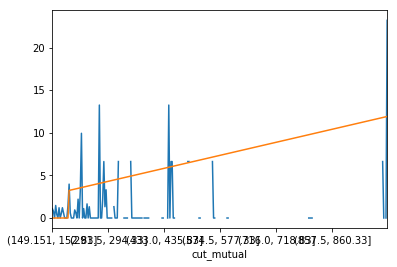

In [8]:
lls_score.plot()
new_lls.plot()

Text(0, 0.5, 'PPV')

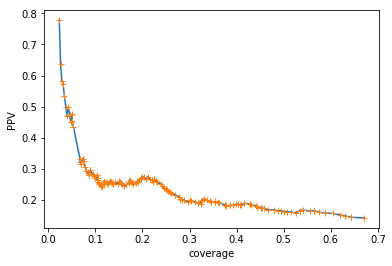

In [9]:
import matplotlib.pyplot as plt
plt.plot(tradeoff['coverage'], tradeoff['PPV'], '-')
plt.plot(tradeoff['coverage'], tradeoff['PPV'], '+')
plt.xlabel('coverage')
plt.ylabel('PPV')

In [10]:
tradeoff.to_csv('~/data0118/PPV_coverage/string_300_rm_plasmid')

In [12]:
output = '/home/hermuba/data0118/network1122/string_rm_plasmid_edgelist'
map_lls_to_whole_data(net, new_lls, 'combined_score', true_thres, output, 'string')

/home/hermuba/resistanceExp/Genome/goldstandard_pair/lls.py:152: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  all_df['lls'] = all_df[score].map(new_lls)
/home/hermuba/miniconda3/lib/python3.6/site-packages/pandas/core/frame.py:4034: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  downcast=downcast, **kwargs)


(59900, 17)
11.945448875778641
(59900, 17)
(57887, 17)
11.945448875778641
(57887, 17)
(59898, 17)
11.945448875778641
(59898, 17)
(58034, 17)
11.945448875778641
(58034, 17)
(57462, 17)
11.945448875778641
(57462, 17)
(59491, 17)
11.945448875778641
(59491, 17)
(59633, 17)
11.945448875778641
(59633, 17)
(62867, 17)
11.945448875778641
(62867, 17)
(58952, 17)
11.945448875778641
(58952, 17)
(60771, 17)
11.945448875778641
(60771, 17)
(29757, 17)
11.945448875778641
(29757, 17)
done with string
